In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier, Pool
import numpy as np
from sklearn.impute import SimpleImputer

In [3]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

In [12]:
train = pd.read_csv("train.csv")

In [4]:
test = pd.read_csv('test.csv')

In [13]:
train.drop('ID', axis=1, inplace=True)
train.fillna(-9999, inplace=True)

In [21]:
int_vars = list(train.select_dtypes(include=['int16', 'int32', 'int64']).columns)

In [22]:
float_vars = list(train.select_dtypes(include=['float16', 'float32', 'float64']).columns)

In [25]:
object_vars = list(train.select_dtypes(include=['object']).columns)

In [23]:
train[int_vars].describe()

,ID,target,v38,v62,v72,v129
count,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000
mean,114228.928228,0.761199,0.090928,1.030694,1.431767,0.310144
std,65934.487362,0.426353,0.583478,0.696244,0.922267,0.693262
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57280.000000,1.000000,0.000000,1.000000,1.000000,0.000000
50%,114189.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,171206.000000,1.000000,0.000000,1.000000,2.000000,0.000000
max,228713.000000,1.000000,12.000000,7.000000,12.000000,11.000000


In [24]:
train[float_vars].describe()

,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v23,v25,v26,v27,v28,v29,v32,v33,v34,v35,v36,v37,v39,v40,v41,v42,v43,v44,v45,v46,v48,v49,v50,v51,v53,v54,v55,v57,v58,v59,...,v70,v73,v76,v77,v78,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v108,v109,v111,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v126,v127,v128,v130,v131
count,6.448900e+04,6.452500e+04,6.452500e+04,6.569700e+04,6.448900e+04,6.448900e+04,6.570200e+04,6.447000e+04,1.142370e+05,6.448500e+04,1.142350e+05,6.448900e+04,1.143170e+05,6.448500e+04,6.442600e+04,6.452500e+04,6.448900e+04,6.447800e+04,64481.000000,113710.000000,6.364600e+04,65702.000000,6.448900e+04,6.448900e+04,6.448900e+04,6.448900e+04,6.448900e+04,6.448900e+04,1.142100e+05,6.448900e+04,6.569700e+04,6.447800e+04,6.448500e+04,1.142100e+05,6.448900e+04,6.448900e+04,6.448500e+04,6.452500e+04,6.448900e+04,65702.000000,6.452500e+04,6.448900e+04,1.142350e+05,6.364300e+04,6.448500e+04,65702.000000,6.448900e+04,6.448900e+04,6.448500e+04,6.452500e+04,...,65685.000000,6.448500e+04,6.452500e+04,6.448900e+04,6.442600e+04,6.447000e+04,6.569700e+04,6.569700e+04,6.448900e+04,6.448900e+04,6.363900e+04,6.448900e+04,65658.000000,6.448900e+04,65702.000000,6.448500e+04,6.447800e+04,6.448900e+04,6.448900e+04,6.447800e+04,6.448900e+04,6.447800e+04,6.566700e+04,6.448900e+04,6.448500e+04,6.452500e+04,6.300500e+04,6.448900e+04,6.448900e+04,65663.000000,6.452500e+04,6.569700e+04,6.569700e+04,6.448900e+04,1.142910e+05,6.442600e+04,6.448500e+04,6.569700e+04,6.447800e+04,6.364100e+04,6.448500e+04,6.448100e+04,6.447000e+04,63643.000000,6.570200e+04,6.448900e+04,6.448900e+04,6.569700e+04,6.447800e+04,6.442600e+04
mean,1.630686e+00,7.464411e+00,4.145098e+00,8.742359e+00,2.436402e+00,2.483921e+00,1.496569e+00,9.031859e+00,1.883046e+00,1.544741e+01,6.881304e+00,3.798396e+00,1.209428e+01,2.080911e+00,4.923222e+00,3.832270e+00,8.410455e-01,2.223005e-01,17.773592,7.029740,1.093088e+00,1.698129,1.876031e+00,2.743454e+00,5.093328e+00,8.206416e+00,1.622151e+00,2.161633e+00,6.406236e+00,8.122387e+00,1.337560e+01,7.414708e-01,1.237184e+00,1.046593e+01,7.182551e+00,1.292497e+01,2.216597e+00,1.079517e+01,9.142231e+00,1.630525,1.253802e+01,8.016547e+00,1.504265e+00,7.198159e+00,1.571130e+01,1.253856,1.559556e+00,4.077828e+00,7.701653e+00,1.058794e+01,...,12.269960,2.433303e+00,2.405056e+00,7.307366e+00,1.333448e+01,2.209700e+00,7.287174e+00,6.208356e+00,2.173808e+00,1.607956e+00,2.822253e+00,1.220184e+00,10.180216,1.924184e+00,1.518425,9.669126e-01,5.823668e-01,5.475185e+00,3.852883e+00,6.657576e-01,6.457952e+00,7.622554e+00,7.667624e+00,1.250721e+00,1.209162e+01,6.866414e+00,2.890289e+00,5.296716e+00,2.642828e+00,1.081045,1.179136e+01,2.152620e+00,4.181284e+00,3.365314e+00,1.357445e+01,1.054805e+01,2.291218e+00,8.303857e+00,8.364651e+00,3.168970e+00,1.291218e+00,2.737596e+00,6.822439e+00,3.549938,9.198120e-01,1.672658e+00,3.239542e+00,2.030373e+00,1.925763e+00,1.739389e+00
std,1.082813e+00,2.961676e+00,1.148263e+00,2.036018e+00,5.999653e-01,5.894485e-01,2.783003e+00,1.930262e+00,1.393979e+00,7.900790e-01,9.244945e-01,1.175892e+00,1.443947e+00,7.329166e-01,1.791187e+00,1.911504e+00,6.162762e-01,1.713459e-01,1.155002,1.072271,4.003695e+00,2.956854,5.511957e-01,8.343556e-01,2.677940e+00,1.285432e+00,5.635237e-01,9.848598e-01,2.025179e+00,1.339802e+00,2.355631e+00,5.413723e-01,2.358155e+00,3.169183e+00,1.004472e+00,9.969760e-01,6.479912e-01,2.110887e+00,2.064508e+00,2.895831,2.196164e+00,9.026805e-01,1.168329e+00,2.510385e+00,7.993680e-01,2.314476,8.343910e-01,6.780415e-01,6.841238e+00,2.071674e+00,...,2.314462,7.986390e-01,1.383719e+00,1.256062e+00,1.843919e+00,1.074983e+00,2.223637e+00,3.678042e+00,1.062289e+00,9.412067e-01,1.423208e+00,4.658070e-01,3.000053,1.048548e+00,2.812902,1.789302e-01,2.402102e-01,1.640349e+00,8.549950e-01,2.641127e-01,1.120472e+00,1.924074e+00,2.325863e+00,4.614097e-01,6.888297e+00,2.354673e+00,1.824041e+00,1.228804e+00,8.85

In [27]:
train[object_vars].nunique()

v3          3
v22     18210
v24         5
v30         7
v31         3
v47        10
v52        12
v56       122
v66         3
v71         9
v74         3
v75         4
v79        18
v91         7
v107        7
v110        3
v112       22
v113       36
v125       90
dtype: int64

In [28]:
grouped_feature_ls = []
correlated_groups = []

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [38]:
corr_features = correlation(train[float_vars], 0.9)

In [39]:
correlated_features = set(corr_features) 
print(len(correlated_features))

102


In [46]:
corr = train.drop('target', axis = 1).corr()

In [115]:
columns = []
sum_cor = []
for col in corr.columns:
    print(col, np.abs(corr[col]).sum(axis=0))
    columns.append(col)
    sum_cor.append(np.abs(corr[col]).sum(axis=0))
a_dict = dict(zip(columns, sum_cor))

v1 99.07837530301008
v2 99.06015857315957
v4 99.06012049823931
v5 96.02358250122457
v6 99.0783830566008
v7 99.07838584488292
v8 96.03076378486273
v9 99.0560067734118
v10 7.531554777549875
v11 99.07618806426407
v12 7.59837689918564
v13 99.07836097219268
v14 2.7398038440689882
v15 99.07616643625751
v16 98.98725401961707
v17 99.0601087264765
v18 99.07837615643948
v19 99.06771441290041
v20 99.0708644384477
v21 3.5348274819423557
v23 98.29472192064176
v25 96.03077512241659
v26 99.07838043471861
v27 99.07838410758949
v28 99.07834736728108
v29 99.07839488010833
v32 99.07837099081976
v33 99.07835875402833
v34 8.30157690379152
v35 99.07838638820479
v36 96.0226139138419
v37 99.06771097915441
v38 1.8242060296567533
v39 99.07619569849122
v40 8.451720567265976
v41 99.07838931160964
v42 99.07838366165436
v43 99.07617856250862
v44 99.06012353199398
v45 99.07837062097079
v46 96.03075232855952
v48 99.06003992358285
v49 99.07838343245447
v50 7.574755285124813
v51 98.29272306561853
v53 99.0761878732103
v

In [124]:
correlat = pd.DataFrame(data=a_dict.values(), index=a_dict.keys(), columns=['sum_corr'])

In [135]:
idx_good_corr = correlat.sort_values(by='sum_corr')[correlat['sum_corr'] < 30].index

<ipython-input-135-c73ce5807847>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  idx_good_corr = correlat.sort_values(by='sum_corr')[correlat['sum_corr'] < 30].index


Сравню выбор столбцов с способом mutual_info

In [138]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [139]:
mi = mutual_info_classif(train[float_vars].fillna(0), train['target'])

In [140]:
mi

array([0.01485192, 0.02117419, 0.01992866, 0.01289731, 0.01963185,
       0.01976279, 0.01365105, 0.01465651, 0.02379416, 0.01937039,
       0.02181202, 0.02035127, 0.01920262, 0.01754065, 0.01277381,
       0.01893851, 0.01039951, 0.01798311, 0.01866996, 0.01559717,
       0.00820836, 0.01473934, 0.01945963, 0.01857421, 0.01302418,
       0.0197565 , 0.01764178, 0.02036064, 0.01035645, 0.01936425,
       0.01119815, 0.01095115, 0.01813091, 0.00688844, 0.01940988,
       0.02050807, 0.01735427, 0.02069837, 0.02002363, 0.01460571,
       0.02020547, 0.01821834, 0.04198994, 0.02095983, 0.01787064,
       0.01583973, 0.01952808, 0.01830473, 0.01730898, 0.01902525,
       0.01949738, 0.01864727, 0.01452272, 0.02164122, 0.01835272,
       0.02124227, 0.01993275, 0.01281233, 0.01483084, 0.01868759,
       0.02052789, 0.0183853 , 0.01226708, 0.01382304, 0.01290289,
       0.01270921, 0.01780208, 0.01959945, 0.01769214, 0.01943137,
       0.01496118, 0.01958432, 0.01514128, 0.01641639, 0.01880

In [141]:
mi = pd.Series(mi)
mi.index = train[float_vars].columns
mi_sort = mi.sort_values(ascending=False).head(10)

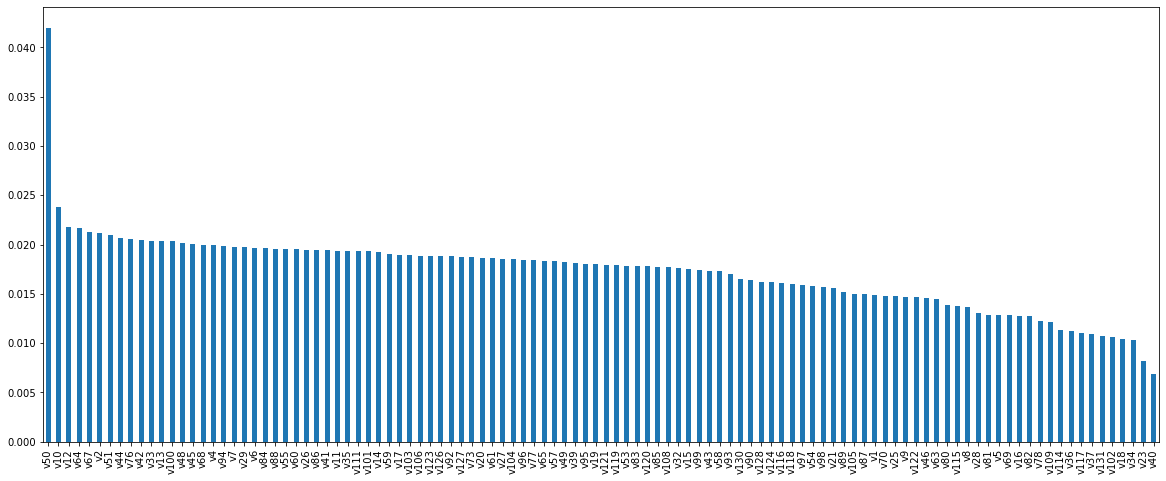

In [142]:
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [144]:
mi_idx = mi_sort.index

In [160]:
mi_cor_columns = list(set(list(mi_idx) + list(idx_good_corr)))

In [158]:
idx_good_corr

Index(['v38', 'v14', 'v21', 'v62', 'v129', 'v114', 'v72', 'v10', 'v50', 'v12',
       'v34', 'v40'],
      dtype='object')

In [157]:
mi_idx

Index(['v50', 'v10', 'v12', 'v64', 'v67', 'v2', 'v51', 'v44', 'v76', 'v42'], dtype='object')

In [168]:
from sklearn.model_selection import train_test_split

In [170]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('target', axis=1), 
                                                    train['target'], 
                                                    test_size=0.3,
                                                    stratify=train['target'],
                                                    random_state=42)

In [172]:
categorical_features_ind = np.where(X_train.dtypes != np.float)[0]

In [173]:
import shap

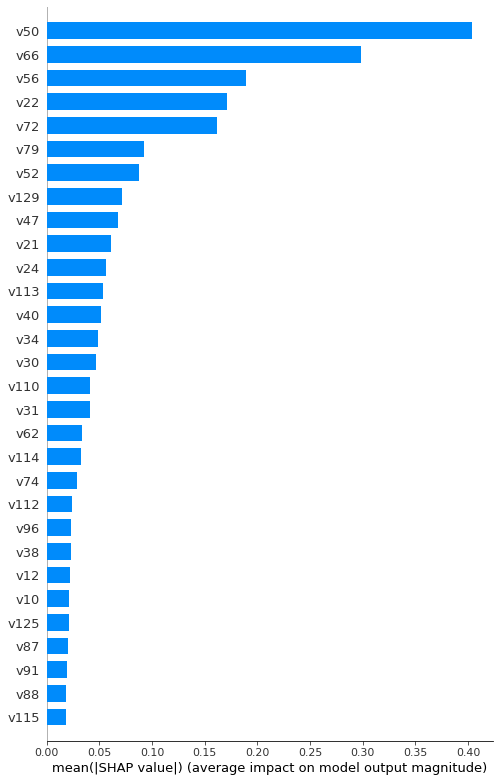

In [180]:
train_pool = Pool(X_train, y_train, cat_features=categorical_features_ind)
clf = CatBoostClassifier(learning_rate=0.08, 
                         iterations=1200,
                         random_strength=0.15,
                         random_seed=0, 
                         model_size_reg=0.1,
                         logging_level='Silent')
clf.fit(train_pool)
shap_all = clf.get_feature_importance(train_pool, 'ShapValues')
shap_values = shap_all[:, :-1]
shap.summary_plot(shap_values, X_train, plot_type='bar', max_display=30)

In [178]:
idx_good_corr

Index(['v38', 'v14', 'v21', 'v62', 'v129', 'v114', 'v72', 'v10', 'v50', 'v12',
       'v34', 'v40'],
      dtype='object')

In [185]:
shap_columns =['v66', 'v56', 'v22', 'v79', 'v52', 'v47', 'v24', 'v113', 'v30', 'v110']

In [186]:
good_columns = shap_columns + list(idx_good_corr)

In [6]:
good_columns = ['v66', 'v56', 'v22', 'v79', 'v52', 'v47', 'v24', 'v113', 'v30', 'v110', 'v38', 'v14', 'v21', 'v62', 'v129', 'v114', 'v72', 'v10', 'v50', 'v12', 'v34', 'v40']

In [7]:
test_id = test['ID']

In [8]:
test = test.drop('ID', axis=1)

In [9]:
test = test.fillna(-9999)

In [10]:
test = test[good_columns]

In [15]:
train = train[good_columns]

In [14]:
train_target = train['target']

In [200]:
X_train = X_train[good_columns]

In [201]:
X_test = X_test[good_columns]

,v66,v56,v22,v79,v52,v47,v24,v113,v30,v110,v38,v14,v21,v62,v129,v114,v72,v10,v50,v12,v34,v40
0,C,DI,XDX,E,G,C,C,-9999,C,B,0,11.636387,7.730923,1,0,15.634907,1,0.503281,0.899420,6.085711,7.270147,7.711453
1,A,DY,GUV,D,G,E,C,G,C,A,0,11.636386,6.763110,2,0,10.308044,2,1.312910,1.379210,6.507647,3.615077,14.305766
2,A,AS,FQ,E,F,C,E,-9999,-9999,B,0,9.603542,5.245035,1,2,11.205561,3,0.765864,0.604504,6.384670,4.043864,13.077201
3,A,BW,ACUE,B,H,C,D,-9999,C,B,0,14.094723,7.517125,1,1,13.777666,2,6.542669,3.329176,9.646653,8.703550,11.523045
4,C,-9999,HIT,C,H,I,E,G,-9999,A,0,10.991098,6.414567,1,0,14.097099,1,1.050328,1.364536,6.320087,6.083151,10.138920


In [16]:
cat_features_ids_train = np.where(train.dtypes != np.float)[0]

In [34]:
cb_model = CatBoostClassifier(learning_rate=0.06, 
                              iterations=1600,
                              random_strength=0.15,
                              model_size_reg=0.1,
                              random_seed=0, 
                              max_depth=6, 
                              l2_leaf_reg=42, 
                              border_count=240, 
                              bagging_temperature=1.8
                             )

In [35]:
cb_model.fit(train, train_target,
    cat_features = cat_features_ids_train
)

0:	learn: 0.6650934	total: 378ms	remaining: 10m 4s
1:	learn: 0.6408004	total: 688ms	remaining: 9m 9s
2:	learn: 0.6197881	total: 1.05s	remaining: 9m 17s
3:	learn: 0.6020209	total: 1.3s	remaining: 8m 40s
4:	learn: 0.5855153	total: 1.67s	remaining: 8m 52s
5:	learn: 0.5723468	total: 1.99s	remaining: 8m 47s
6:	learn: 0.5596902	total: 2.28s	remaining: 8m 38s
7:	learn: 0.5491044	total: 2.59s	remaining: 8m 35s
8:	learn: 0.5403777	total: 2.94s	remaining: 8m 39s
9:	learn: 0.5325836	total: 3.26s	remaining: 8m 38s
10:	learn: 0.5257413	total: 3.54s	remaining: 8m 30s
11:	learn: 0.5194839	total: 3.83s	remaining: 8m 26s
12:	learn: 0.5140906	total: 4.08s	remaining: 8m 17s
13:	learn: 0.5095700	total: 4.38s	remaining: 8m 15s
14:	learn: 0.5052587	total: 4.63s	remaining: 8m 8s
15:	learn: 0.5016787	total: 4.88s	remaining: 8m 2s
16:	learn: 0.4986243	total: 5.18s	remaining: 8m 2s
17:	learn: 0.4957043	total: 5.46s	remaining: 8m
18:	learn: 0.4931761	total: 5.76s	remaining: 7m 59s
19:	learn: 0.4909665	total: 6.0

158:	learn: 0.4491824	total: 55.8s	remaining: 8m 25s
159:	learn: 0.4491797	total: 56.1s	remaining: 8m 24s
160:	learn: 0.4491439	total: 56.3s	remaining: 8m 23s
161:	learn: 0.4490265	total: 56.8s	remaining: 8m 23s
162:	learn: 0.4489729	total: 57.1s	remaining: 8m 23s
163:	learn: 0.4489312	total: 57.4s	remaining: 8m 22s
164:	learn: 0.4489304	total: 57.6s	remaining: 8m 21s
165:	learn: 0.4488787	total: 57.9s	remaining: 8m 20s
166:	learn: 0.4488415	total: 58.2s	remaining: 8m 19s
167:	learn: 0.4487636	total: 58.7s	remaining: 8m 20s
168:	learn: 0.4487309	total: 59.1s	remaining: 8m 20s
169:	learn: 0.4486762	total: 59.5s	remaining: 8m 20s
170:	learn: 0.4486114	total: 59.9s	remaining: 8m 20s
171:	learn: 0.4485292	total: 1m	remaining: 8m 22s
172:	learn: 0.4484545	total: 1m	remaining: 8m 22s
173:	learn: 0.4484526	total: 1m 1s	remaining: 8m 22s
174:	learn: 0.4484365	total: 1m 1s	remaining: 8m 21s
175:	learn: 0.4484351	total: 1m 1s	remaining: 8m 20s
176:	learn: 0.4483975	total: 1m 2s	remaining: 8m 20s

312:	learn: 0.4447229	total: 1m 47s	remaining: 7m 23s
313:	learn: 0.4447228	total: 1m 48s	remaining: 7m 22s
314:	learn: 0.4447227	total: 1m 48s	remaining: 7m 21s
315:	learn: 0.4447158	total: 1m 48s	remaining: 7m 21s
316:	learn: 0.4446833	total: 1m 49s	remaining: 7m 21s
317:	learn: 0.4446422	total: 1m 49s	remaining: 7m 20s
318:	learn: 0.4446409	total: 1m 49s	remaining: 7m 20s
319:	learn: 0.4446229	total: 1m 50s	remaining: 7m 20s
320:	learn: 0.4445944	total: 1m 50s	remaining: 7m 19s
321:	learn: 0.4445537	total: 1m 50s	remaining: 7m 19s
322:	learn: 0.4445494	total: 1m 51s	remaining: 7m 18s
323:	learn: 0.4445488	total: 1m 51s	remaining: 7m 18s
324:	learn: 0.4445480	total: 1m 51s	remaining: 7m 17s
325:	learn: 0.4445274	total: 1m 51s	remaining: 7m 17s
326:	learn: 0.4445263	total: 1m 52s	remaining: 7m 16s
327:	learn: 0.4445262	total: 1m 52s	remaining: 7m 16s
328:	learn: 0.4445157	total: 1m 52s	remaining: 7m 15s
329:	learn: 0.4445116	total: 1m 52s	remaining: 7m 14s
330:	learn: 0.4444540	total:

466:	learn: 0.4422109	total: 2m 42s	remaining: 6m 33s
467:	learn: 0.4421963	total: 2m 42s	remaining: 6m 32s
468:	learn: 0.4421924	total: 2m 42s	remaining: 6m 32s
469:	learn: 0.4421850	total: 2m 43s	remaining: 6m 31s
470:	learn: 0.4421646	total: 2m 43s	remaining: 6m 31s
471:	learn: 0.4421646	total: 2m 43s	remaining: 6m 31s
472:	learn: 0.4421624	total: 2m 44s	remaining: 6m 31s
473:	learn: 0.4421430	total: 2m 44s	remaining: 6m 30s
474:	learn: 0.4421430	total: 2m 44s	remaining: 6m 30s
475:	learn: 0.4421219	total: 2m 45s	remaining: 6m 29s
476:	learn: 0.4421142	total: 2m 45s	remaining: 6m 29s
477:	learn: 0.4421060	total: 2m 45s	remaining: 6m 29s
478:	learn: 0.4421047	total: 2m 46s	remaining: 6m 29s
479:	learn: 0.4420707	total: 2m 46s	remaining: 6m 28s
480:	learn: 0.4420684	total: 2m 46s	remaining: 6m 28s
481:	learn: 0.4420675	total: 2m 47s	remaining: 6m 27s
482:	learn: 0.4420614	total: 2m 47s	remaining: 6m 27s
483:	learn: 0.4420608	total: 2m 48s	remaining: 6m 27s
484:	learn: 0.4420489	total:

619:	learn: 0.4404069	total: 3m 32s	remaining: 5m 35s
620:	learn: 0.4403985	total: 3m 32s	remaining: 5m 35s
621:	learn: 0.4403871	total: 3m 33s	remaining: 5m 35s
622:	learn: 0.4403867	total: 3m 33s	remaining: 5m 34s
623:	learn: 0.4403867	total: 3m 33s	remaining: 5m 34s
624:	learn: 0.4403663	total: 3m 34s	remaining: 5m 34s
625:	learn: 0.4403542	total: 3m 34s	remaining: 5m 33s
626:	learn: 0.4403508	total: 3m 34s	remaining: 5m 33s
627:	learn: 0.4403507	total: 3m 35s	remaining: 5m 33s
628:	learn: 0.4403302	total: 3m 35s	remaining: 5m 32s
629:	learn: 0.4403210	total: 3m 35s	remaining: 5m 32s
630:	learn: 0.4403185	total: 3m 36s	remaining: 5m 31s
631:	learn: 0.4402927	total: 3m 36s	remaining: 5m 31s
632:	learn: 0.4402783	total: 3m 36s	remaining: 5m 31s
633:	learn: 0.4402782	total: 3m 37s	remaining: 5m 30s
634:	learn: 0.4402725	total: 3m 37s	remaining: 5m 30s
635:	learn: 0.4402691	total: 3m 37s	remaining: 5m 29s
636:	learn: 0.4402691	total: 3m 37s	remaining: 5m 29s
637:	learn: 0.4402654	total:

773:	learn: 0.4390876	total: 4m 17s	remaining: 4m 35s
774:	learn: 0.4390668	total: 4m 18s	remaining: 4m 34s
775:	learn: 0.4390573	total: 4m 18s	remaining: 4m 34s
776:	learn: 0.4390553	total: 4m 18s	remaining: 4m 34s
777:	learn: 0.4390399	total: 4m 19s	remaining: 4m 33s
778:	learn: 0.4390328	total: 4m 19s	remaining: 4m 33s
779:	learn: 0.4390254	total: 4m 19s	remaining: 4m 33s
780:	learn: 0.4390220	total: 4m 20s	remaining: 4m 32s
781:	learn: 0.4390132	total: 4m 20s	remaining: 4m 32s
782:	learn: 0.4389866	total: 4m 20s	remaining: 4m 31s
783:	learn: 0.4389866	total: 4m 20s	remaining: 4m 31s
784:	learn: 0.4389766	total: 4m 20s	remaining: 4m 30s
785:	learn: 0.4389762	total: 4m 21s	remaining: 4m 30s
786:	learn: 0.4389717	total: 4m 21s	remaining: 4m 30s
787:	learn: 0.4389451	total: 4m 21s	remaining: 4m 29s
788:	learn: 0.4389352	total: 4m 22s	remaining: 4m 29s
789:	learn: 0.4389225	total: 4m 22s	remaining: 4m 29s
790:	learn: 0.4389225	total: 4m 22s	remaining: 4m 28s
791:	learn: 0.4389093	total:

926:	learn: 0.4373763	total: 5m 1s	remaining: 3m 39s
927:	learn: 0.4373458	total: 5m 2s	remaining: 3m 38s
928:	learn: 0.4373455	total: 5m 2s	remaining: 3m 38s
929:	learn: 0.4372947	total: 5m 2s	remaining: 3m 37s
930:	learn: 0.4372812	total: 5m 2s	remaining: 3m 37s
931:	learn: 0.4372800	total: 5m 3s	remaining: 3m 37s
932:	learn: 0.4372607	total: 5m 3s	remaining: 3m 36s
933:	learn: 0.4372580	total: 5m 3s	remaining: 3m 36s
934:	learn: 0.4372579	total: 5m 4s	remaining: 3m 36s
935:	learn: 0.4372351	total: 5m 4s	remaining: 3m 35s
936:	learn: 0.4372299	total: 5m 4s	remaining: 3m 35s
937:	learn: 0.4372049	total: 5m 4s	remaining: 3m 35s
938:	learn: 0.4371804	total: 5m 5s	remaining: 3m 34s
939:	learn: 0.4371779	total: 5m 5s	remaining: 3m 34s
940:	learn: 0.4371647	total: 5m 5s	remaining: 3m 34s
941:	learn: 0.4371607	total: 5m 5s	remaining: 3m 33s
942:	learn: 0.4371576	total: 5m 6s	remaining: 3m 33s
943:	learn: 0.4371564	total: 5m 6s	remaining: 3m 32s
944:	learn: 0.4371305	total: 5m 6s	remaining: 

1078:	learn: 0.4358079	total: 5m 44s	remaining: 2m 46s
1079:	learn: 0.4357939	total: 5m 44s	remaining: 2m 46s
1080:	learn: 0.4357828	total: 5m 45s	remaining: 2m 45s
1081:	learn: 0.4357627	total: 5m 45s	remaining: 2m 45s
1082:	learn: 0.4357627	total: 5m 45s	remaining: 2m 44s
1083:	learn: 0.4357576	total: 5m 45s	remaining: 2m 44s
1084:	learn: 0.4357374	total: 5m 46s	remaining: 2m 44s
1085:	learn: 0.4357365	total: 5m 46s	remaining: 2m 43s
1086:	learn: 0.4357353	total: 5m 46s	remaining: 2m 43s
1087:	learn: 0.4357189	total: 5m 46s	remaining: 2m 43s
1088:	learn: 0.4357177	total: 5m 47s	remaining: 2m 42s
1089:	learn: 0.4357177	total: 5m 47s	remaining: 2m 42s
1090:	learn: 0.4357109	total: 5m 47s	remaining: 2m 42s
1091:	learn: 0.4357096	total: 5m 48s	remaining: 2m 41s
1092:	learn: 0.4357064	total: 5m 48s	remaining: 2m 41s
1093:	learn: 0.4356919	total: 5m 48s	remaining: 2m 41s
1094:	learn: 0.4356908	total: 5m 48s	remaining: 2m 40s
1095:	learn: 0.4356899	total: 5m 49s	remaining: 2m 40s
1096:	lear

1229:	learn: 0.4343307	total: 6m 26s	remaining: 1m 56s
1230:	learn: 0.4343122	total: 6m 26s	remaining: 1m 55s
1231:	learn: 0.4343049	total: 6m 26s	remaining: 1m 55s
1232:	learn: 0.4342971	total: 6m 27s	remaining: 1m 55s
1233:	learn: 0.4342751	total: 6m 27s	remaining: 1m 54s
1234:	learn: 0.4342738	total: 6m 27s	remaining: 1m 54s
1235:	learn: 0.4342547	total: 6m 27s	remaining: 1m 54s
1236:	learn: 0.4342545	total: 6m 28s	remaining: 1m 53s
1237:	learn: 0.4342326	total: 6m 28s	remaining: 1m 53s
1238:	learn: 0.4342238	total: 6m 28s	remaining: 1m 53s
1239:	learn: 0.4342215	total: 6m 29s	remaining: 1m 52s
1240:	learn: 0.4342103	total: 6m 29s	remaining: 1m 52s
1241:	learn: 0.4342083	total: 6m 29s	remaining: 1m 52s
1242:	learn: 0.4341959	total: 6m 29s	remaining: 1m 51s
1243:	learn: 0.4341821	total: 6m 30s	remaining: 1m 51s
1244:	learn: 0.4341766	total: 6m 30s	remaining: 1m 51s
1245:	learn: 0.4341654	total: 6m 30s	remaining: 1m 51s
1246:	learn: 0.4341568	total: 6m 31s	remaining: 1m 50s
1247:	lear

1379:	learn: 0.4329217	total: 7m 9s	remaining: 1m 8s
1380:	learn: 0.4329203	total: 7m 9s	remaining: 1m 8s
1381:	learn: 0.4329198	total: 7m 9s	remaining: 1m 7s
1382:	learn: 0.4328963	total: 7m 10s	remaining: 1m 7s
1383:	learn: 0.4328963	total: 7m 10s	remaining: 1m 7s
1384:	learn: 0.4328950	total: 7m 10s	remaining: 1m 6s
1385:	learn: 0.4328949	total: 7m 11s	remaining: 1m 6s
1386:	learn: 0.4328815	total: 7m 11s	remaining: 1m 6s
1387:	learn: 0.4328654	total: 7m 11s	remaining: 1m 5s
1388:	learn: 0.4328592	total: 7m 11s	remaining: 1m 5s
1389:	learn: 0.4328567	total: 7m 12s	remaining: 1m 5s
1390:	learn: 0.4328566	total: 7m 12s	remaining: 1m 5s
1391:	learn: 0.4328305	total: 7m 12s	remaining: 1m 4s
1392:	learn: 0.4328269	total: 7m 13s	remaining: 1m 4s
1393:	learn: 0.4328253	total: 7m 13s	remaining: 1m 4s
1394:	learn: 0.4328252	total: 7m 13s	remaining: 1m 3s
1395:	learn: 0.4328123	total: 7m 14s	remaining: 1m 3s
1396:	learn: 0.4327869	total: 7m 14s	remaining: 1m 3s
1397:	learn: 0.4327866	total: 7

1532:	learn: 0.4317753	total: 7m 52s	remaining: 20.7s
1533:	learn: 0.4317655	total: 7m 53s	remaining: 20.4s
1534:	learn: 0.4317640	total: 7m 53s	remaining: 20s
1535:	learn: 0.4317506	total: 7m 53s	remaining: 19.7s
1536:	learn: 0.4317365	total: 7m 53s	remaining: 19.4s
1537:	learn: 0.4317177	total: 7m 54s	remaining: 19.1s
1538:	learn: 0.4317177	total: 7m 54s	remaining: 18.8s
1539:	learn: 0.4317008	total: 7m 54s	remaining: 18.5s
1540:	learn: 0.4316855	total: 7m 55s	remaining: 18.2s
1541:	learn: 0.4316794	total: 7m 55s	remaining: 17.9s
1542:	learn: 0.4316639	total: 7m 55s	remaining: 17.6s
1543:	learn: 0.4316314	total: 7m 56s	remaining: 17.3s
1544:	learn: 0.4316197	total: 7m 56s	remaining: 17s
1545:	learn: 0.4316185	total: 7m 56s	remaining: 16.7s
1546:	learn: 0.4316082	total: 7m 57s	remaining: 16.3s
1547:	learn: 0.4316063	total: 7m 57s	remaining: 16s
1548:	learn: 0.4315976	total: 7m 57s	remaining: 15.7s
1549:	learn: 0.4315966	total: 7m 58s	remaining: 15.4s
1550:	learn: 0.4315920	total: 7m 5

In [232]:
from tqdm.notebook import trange, tqdm

In [36]:
proba = cb_model.predict_proba(test)[:, 1]

pd.DataFrame({'ID': test_id, 'PredictedProb': proba}).to_csv(
    'subm_improved8.csv', index=False)